In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from google.colab import files
uploaded = files.upload()

Saving data-01.data to data-01.data


In [28]:
import pandas as pd
import io

dataframe = pd.read_csv(io.StringIO(uploaded['data-01.data'].decode('utf-8')), names=["Date", "Time", "Code", "Value"])
dataframe

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
938,09-02-1991,17:30,33,7
939,09-02-1991,23:00,48,155
940,09-03-1991,7:20,58,110
941,09-03-1991,7:20,33,9


In [29]:
#Liệt kê một số dòng dữ liệu ban đầu 
dataframe.head(5)

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [ ]:
#tên các attributes
Column 1: Date in MM-DD-YYYY format
Column 2: Time in XX:YY format
Column 3: Code
Colun 4: Value

'The Code field is deciphered as follows:

33 = Regular insulin dose
34 = NPH insulin dose
35 = UltraLente insulin dose
48 = Unspecified blood glucose measurement
57 = Unspecified blood glucose measurement
58 = Pre-breakfast blood glucose measurement
59 = Post-breakfast blood glucose measurement
60 = Pre-lunch blood glucose measurement
61 = Post-lunch blood glucose measurement
62 = Pre-supper blood glucose measurement
63 = Post-supper blood glucose measurement
64 = Pre-snack blood glucose measurement
65 = Hypoglycemic symptoms
66 = Typical meal ingestion
67 = More-than-usual meal ingestion
68 = Less-than-usual meal ingestion
69 = Typical exercise activity
70 = More-than-usual exercise activity
71 = Less-than-usual exercise activity
72 = Unspecified special event

In [30]:
# kiểu dữ liệu
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    943 non-null    object
 1   Time    943 non-null    object
 2   Code    943 non-null    int64 
 3   Value   943 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 29.6+ KB


In [31]:
# số lượng cột (attribute)
print("Số cột =",len(dataframe.iloc[0]))

Số cột = 4


In [32]:
#số lượng dòng (instance)
print("Số dòng =",len(dataframe)) 

Số dòng = 943


In [33]:
#lấy tất cả các cột dữ liệu có kiểu số (ko phải kiểu categorial)
g = dataframe.columns.to_series().groupby(dataframe.dtypes).groups
g
dataframe.select_dtypes(include='int64')

,Code,Value
0,58,100
1,33,9
2,34,13
3,62,119
4,33,7
...,...,...
938,33,7
939,48,155
940,58,110
941,33,9


In [35]:
# Lấy các dòng dữ liệu từ dòng thứ m tới dòng thứ n 
m=45
n=51
dataframe.iloc[45:51]

,Date,Time,Code,Value
45,04-28-1991,8:42,34,14
46,04-28-1991,17:06,62,96
47,04-28-1991,17:06,33,7
48,04-28-1991,22:30,48,200
49,04-29-1991,7:39,58,128
50,04-29-1991,7:39,33,9


In [37]:
# lọc các dòng dữ liệu và các cột dữ liệu theo tiêu chí tự đặt ra 
dataframe[['Code']].head(10)
dataframe[dataframe['Code'] > 40].head(10)

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
3,04-21-1991,17:08,62,119
5,04-21-1991,22:51,48,123
6,04-22-1991,7:35,58,216
10,04-22-1991,16:56,62,211
12,04-23-1991,7:25,58,257
15,04-23-1991,17:25,62,129
17,04-24-1991,7:52,58,239
21,04-24-1991,17:10,62,129
22,04-24-1991,22:09,48,340


In [50]:
#Tìm hiểu xem có giá trị dữ liệu nào bị NAN (null) hay không:
count_nan_date = dataframe['Date'].isnull().sum()
print ('Count of NaN Date: ' + str(count_nan_date))

count_nan_time = dataframe['Time'].isnull().sum()
print ('Count of NaN Time: ' + str(count_nan_time))

count_nan_code = dataframe['Code'].isnull().sum()
print ('Count of NaN Code: ' + str(count_nan_code))

count_nan_value = dataframe['Value'].isnull().sum()
print ('Count of NaN Value: ' + str(count_nan_value))

count_nan_checkNaN = dataframe['CheckNaN'].isnull().sum()
print ('Count of NaN CheckNaN: ' + str(count_nan_checkNaN))


Count of NaN Date: 0
Count of NaN Time: 0
Count of NaN Code: 0
Count of NaN Value: 0
Count of NaN CheckNaN: 308


In [52]:
import random
#bỏ tất cả các cột có giá trị NAN

#Tạo list có độ dài tương đương với số dòng của DataFrame
checkNaN= [random.choice([np.nan,True, False]) for i in range(len(dataframe))]

#Thêm cột isSale vào DataFrame
dataframe['CheckNaN'] = checkNaN
dataframe.head(10)

,Date,Time,Code,Value,CheckNaN
0,04-21-1991,9:09,58,100,NaN
1,04-21-1991,9:09,33,9,NaN
2,04-21-1991,9:09,34,13,False
3,04-21-1991,17:08,62,119,False
4,04-21-1991,17:08,33,7,NaN
5,04-21-1991,22:51,48,123,NaN
6,04-22-1991,7:35,58,216,NaN
7,04-22-1991,7:35,33,10,False
8,04-22-1991,7:35,34,13,False
9,04-22-1991,13:40,33,2,True


In [53]:


dataframe1 = dataframe.dropna(axis=1) 
  
dataframe1


,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
938,09-02-1991,17:30,33,7
939,09-02-1991,23:00,48,155
940,09-03-1991,7:20,58,110
941,09-03-1991,7:20,33,9


In [55]:
#bỏ tất cả các dòng có giá trị NAN

dataframe2 = dataframe[dataframe['CheckNaN'].notna()]
dataframe2

,Date,Time,Code,Value,CheckNaN
2,04-21-1991,9:09,34,13,False
3,04-21-1991,17:08,62,119,False
7,04-22-1991,7:35,33,10,False
8,04-22-1991,7:35,34,13,False
9,04-22-1991,13:40,33,2,True
...,...,...,...,...,...
938,09-02-1991,17:30,33,7,True
939,09-02-1991,23:00,48,155,False
940,09-03-1991,7:20,58,110,True
941,09-03-1991,7:20,33,9,False


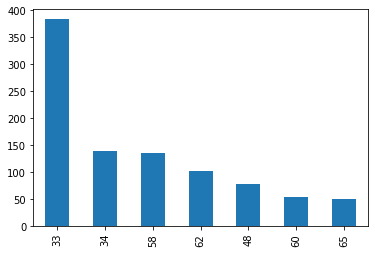

In [56]:
#một số cột dữ liệu theo tần suất của các giá trị của cột đó (đồ thị dạng bar)
dataframe['Code'].value_counts().plot(kind='bar')

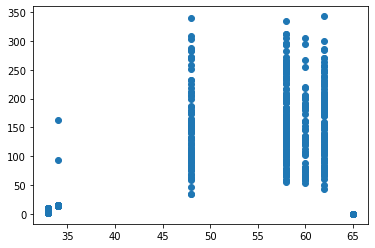

In [72]:
#một số cặp attribute theo dạng đồ thị scatter 
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix 

plt.scatter(dataframe['Code'], dataframe['Value'],  marker='o') 
plt.show() 

In [74]:
#Đổi các giá trị dạng categorical/nomial sang dạng số (numerical)
dataframe_gender = pd.get_dummies(dataframe['CheckNaN'])
dataframe_new = pd.concat([dataframe, dataframe_gender], axis=1)
print(dataframe_new)

           Date   Time  Code  Value CheckNaN  False  True
0    04-21-1991   9:09    58    100      NaN      0     0
1    04-21-1991   9:09    33      9      NaN      0     0
2    04-21-1991   9:09    34     13    False      1     0
3    04-21-1991  17:08    62    119    False      1     0
4    04-21-1991  17:08    33      7      NaN      0     0
..          ...    ...   ...    ...      ...    ...   ...
938  09-02-1991  17:30    33      7     True      0     1
939  09-02-1991  23:00    48    155    False      1     0
940  09-03-1991   7:20    58    110     True      0     1
941  09-03-1991   7:20    33      9    False      1     0
942  09-03-1991   7:20    34     16     True      0     1

[943 rows x 7 columns]


In [79]:
#sử dụng pandas.Factorize

dataframe_code_fac=pd.factorize(dataframe['Code'])
print (dataframe_code_fac)

(array([0, 1, 2, 3, 1, 4, 0, 1, 2, 1, 3, 1, 0, 1, 2, 3, 1, 0, 1, 2, 1, 3,
       4, 1, 0, 1, 2, 1, 3, 1, 4, 1, 0, 1, 2, 1, 3, 1, 0, 1, 2, 3, 1, 0,
       1, 2, 3, 1, 4, 0, 1, 2, 5, 6, 1, 3, 1, 4, 0, 1, 2, 6, 1, 3, 1, 5,
       4, 0, 1, 2, 5, 6, 1, 1, 2, 0, 1, 2, 1, 5, 3, 1, 5, 0, 1, 2, 6, 1,
       3, 1, 4, 0, 1, 2, 1, 1, 4, 5, 0, 1, 2, 1, 5, 1, 4, 1, 0, 1, 2, 1,
       3, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 3, 1, 4, 0, 1, 2, 1, 1, 0, 1, 2,
       1, 5, 3, 1, 4, 0, 1, 2, 1, 3, 1, 4, 0, 1, 2, 1, 3, 1, 0, 1, 2, 1,
       3, 1, 4, 0, 1, 2, 1, 5, 3, 1, 4, 0, 1, 2, 1, 3, 1, 0, 1, 2, 3, 1,
       4, 0, 1, 2, 1, 3, 1, 0, 1, 2, 1, 3, 1, 0, 1, 2, 1, 3, 1, 0, 1, 2,
       1, 3, 1, 0, 1, 2, 6, 1, 1, 0, 1, 2, 1, 3, 1, 0, 1, 2, 6, 3, 1, 4,
       0, 1, 2, 3, 1, 4, 0, 1, 2, 5, 3, 1, 4, 1, 0, 1, 2, 3, 1, 4, 1, 0,
       1, 2, 6, 1, 1, 4, 0, 1, 2, 6, 1, 1, 2, 0, 1, 2, 6, 1, 3, 1, 5, 0,
       1, 2, 6, 1, 1, 4, 0, 1, 2, 1, 5, 3, 1, 0, 1, 2, 6, 1, 3, 1, 4, 0,
       1, 2, 5, 3, 1, 4, 0, 1, 2, 6, 1, 3, 1, 4, 0

In [82]:
# sử dụng LabelEncoder

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
dataframe_encode= label_encoder.fit_transform(dataframe['Code']) 
dataframe_encode

array([3, 0, 1, 5, 0, 2, 3, 0, 1, 0, 5, 0, 3, 0, 1, 5, 0, 3, 0, 1, 0, 5,
       2, 0, 3, 0, 1, 0, 5, 0, 2, 0, 3, 0, 1, 0, 5, 0, 3, 0, 1, 5, 0, 3,
       0, 1, 5, 0, 2, 3, 0, 1, 6, 4, 0, 5, 0, 2, 3, 0, 1, 4, 0, 5, 0, 6,
       2, 3, 0, 1, 6, 4, 0, 0, 1, 3, 0, 1, 0, 6, 5, 0, 6, 3, 0, 1, 4, 0,
       5, 0, 2, 3, 0, 1, 0, 0, 2, 6, 3, 0, 1, 0, 6, 0, 2, 0, 3, 0, 1, 0,
       5, 0, 3, 0, 1, 0, 0, 3, 0, 1, 0, 5, 0, 2, 3, 0, 1, 0, 0, 3, 0, 1,
       0, 6, 5, 0, 2, 3, 0, 1, 0, 5, 0, 2, 3, 0, 1, 0, 5, 0, 3, 0, 1, 0,
       5, 0, 2, 3, 0, 1, 0, 6, 5, 0, 2, 3, 0, 1, 0, 5, 0, 3, 0, 1, 5, 0,
       2, 3, 0, 1, 0, 5, 0, 3, 0, 1, 0, 5, 0, 3, 0, 1, 0, 5, 0, 3, 0, 1,
       0, 5, 0, 3, 0, 1, 4, 0, 0, 3, 0, 1, 0, 5, 0, 3, 0, 1, 4, 5, 0, 2,
       3, 0, 1, 5, 0, 2, 3, 0, 1, 6, 5, 0, 2, 0, 3, 0, 1, 5, 0, 2, 0, 3,
       0, 1, 4, 0, 0, 2, 3, 0, 1, 4, 0, 0, 1, 3, 0, 1, 4, 0, 5, 0, 6, 3,
       0, 1, 4, 0, 0, 2, 3, 0, 1, 0, 6, 5, 0, 3, 0, 1, 4, 0, 5, 0, 2, 3,
       0, 1, 6, 5, 0, 2, 3, 0, 1, 4, 0, 5, 0, 2, 3,

In [90]:
# sử pandas.dummies
datafrmae_dum=pd.get_dummies(dataframe['Code'])
datafrmae_dum

,33,34,48,58,60,62,65
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
938,1,0,0,0,0,0,0
939,0,0,1,0,0,0,0
940,0,0,0,1,0,0,0
941,1,0,0,0,0,0,0
